In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
l3 = nn.Linear(2, 3)

In [4]:
torch.manual_seed(123)

l1 = nn.Linear(1, 1)
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [5]:
for param in l1.named_parameters():
    print('name :', param[0])
    print('tensor :', param[1])
    print('shape :', param[1].shape)
    print('')

name : weight
tensor : Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape : torch.Size([1, 1])

name : bias
tensor : Parameter containing:
tensor([0.0331], requires_grad=True)
shape : torch.Size([1])



In [6]:
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [7]:
x_np = np.arange(-2, 2.1, 1)

x = torch.tensor(x_np).float()
x = x.view(-1, 1)

print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [8]:
y = l1(x)

print(y.shape)
print(y)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]], grad_fn=<AddmmBackward0>)


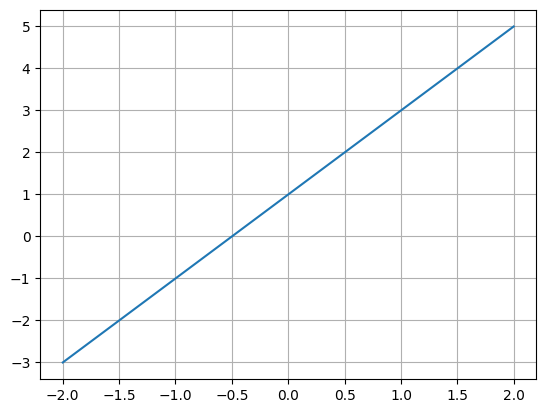

In [9]:
plt.plot(x.data, y.data)
plt.grid()
plt.show()

In [10]:
l2 = nn.Linear(2, 1)

nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [11]:
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [12]:
y2 = l2(x2)

print(y2.shape)
print(y2)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]], grad_fn=<AddmmBackward0>)


In [13]:
l3 = nn.Linear(2, 3)

nn.init.constant_(l3.weight[0, :], 1.0)
nn.init.constant_(l3.weight[1, :], 2.0)
nn.init.constant_(l3.weight[2, :], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [14]:
y3 = l3(x2)

print(y3.shape)
print(y3)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]], grad_fn=<AddmmBackward0>)


In [15]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [16]:
inputs = torch.ones(100, 1)

n_input = 1
n_output = 1
net = Net(n_input, n_output)
outputs = net(inputs)

In [17]:
criterion = nn.MSELoss()

In [18]:
import pandas as pd

In [19]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print('원본 데이터', x_org.shape, yt.shape)
print('항목명 :', feature_names)

원본 데이터 (506, 13) (506,)
항목명 : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [20]:
x = x_org[:, feature_names == 'RM']
print('추출 후', x.shape)
print(x[:5, :])

print('정답 데이터')
print(yt[:5])

추출 후 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답 데이터
[24.  21.6 34.7 33.4 36.2]


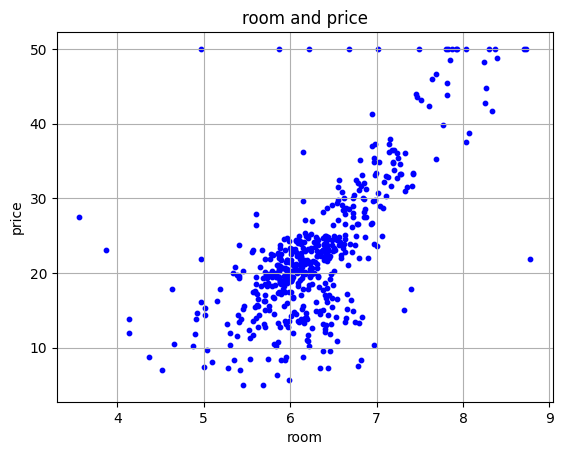

In [21]:
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('room')
plt.ylabel('price')
plt.title('room and price')
plt.grid()
plt.show()

In [22]:
n_input = x.shape[1]
n_output = 1

print(f'입력 차원수: {n_input} 출력 차원수: {n_output}')

입력 차원수: 1 출력 차원수: 1


In [23]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [24]:
net = Net(n_input, n_output)
outputs = net(inputs)

In [25]:
for parameter in net.named_parameters():
    print(f'변수명 : {parameter[0]}')
    print(f'변숫값 : {parameter[1].data}')

변수명 : l1.weight
변숫값 : tensor([[1.]])
변수명 : l1.bias
변숫값 : tensor([1.])


In [26]:
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [27]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [28]:
from torchinfo import summary
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [29]:
from torch import optim

criterion = nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [30]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [31]:
labels1 = labels.view((-1, 1))
print(labels1.shape)

torch.Size([506, 1])


In [33]:
print(f"Model is on: {next(net.parameters()).device}")  
print(f"Inputs are on: {inputs.device}")  

Model is on: cuda:0
Inputs are on: cpu


In [34]:
inputs = inputs.to("cuda")  # 입력 데이터를 GPU로 이동
outputs = net(inputs)  # 실행

In [35]:
outputs = net(inputs)

In [36]:
labels1 = labels1.to("cuda")  # labels1을 GPU로 이동
loss = criterion(outputs, labels1)  # 손실 계산

In [37]:
loss = criterion(outputs, labels1)
print(f"{loss.item():.5f}")

308.44989


In [38]:
outputs = net(inputs)
loss = criterion(outputs, labels1)
loss.backward()

print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]], device='cuda:0')
tensor([-30.4963], device='cuda:0')


In [39]:
optimizer.step()

print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([1.3050], device='cuda:0', requires_grad=True)


In [40]:
optimizer.zero_grad()

print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


In [41]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0,2))

In [51]:
print(f"📌 모델이 위치한 장치: {next(net.parameters()).device}")

print(f"📥 inputs의 장치: {inputs.device}")

print(f"📤 outputs의 장치: {outputs.device}")

📌 모델이 위치한 장치: cuda:0
📥 inputs의 장치: cuda:0
📤 outputs의 장치: cuda:0


In [67]:
device = torch.device("cpu")
inputs = inputs.to(device)
outputs = outputs.to(device)
labels1 = labels1.to(device)
net = net.to(device)

In [52]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0
    loss.backward()
    optimizer.step()

    if (epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22495
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90058
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56716
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94654
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51874
Epoch 1500 loss: 27.38286
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75038
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51793
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29639
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98344
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69227
Epoch 3100 loss: 25.59979
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42137
Epoch 3400 loss: 25.33533
Epoch 3500 loss: 25.25133
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

In [53]:
print(f"초기 손실값 : {history[0, 1]:.5f}")
print(f"최종 손실값 : {history[-1, 1]:.5f}")

초기 손실값 : 154.22495
최종 손실값 : 21.80033


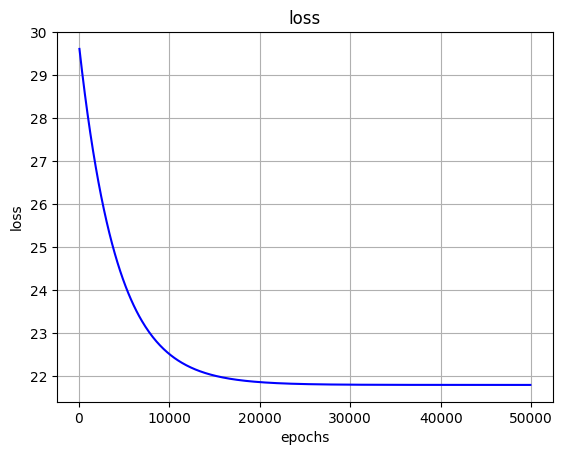

In [65]:
plt.plot(history[1:,0], history[1:, 1], 'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.grid()
plt.show()

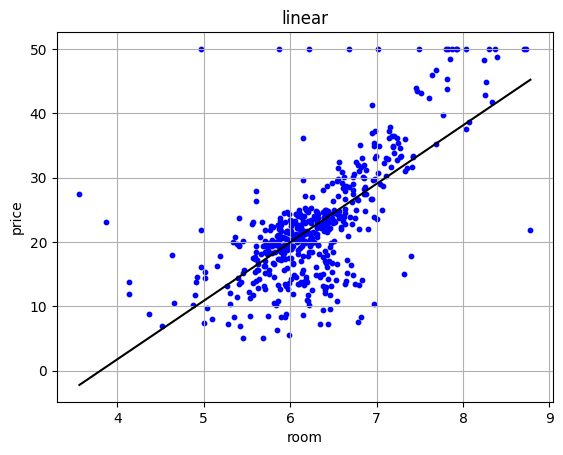

In [68]:
# x의 최솟값, 최댓값
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('room')
plt.ylabel('price')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('linear')
plt.grid()
plt.show()

In [69]:
x_add = x_org[:, feature_names=='LSTAT']
x2 = np.hstack((x, x_add))

print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [71]:
n_input = x2.shape[1]
print(n_input)

net = Net(n_input, n_output)

2


In [73]:
for parameter in net.named_parameters():
    print(f'변수명 : {parameter[0]}')
    print(f'변수값 : {parameter[1].data}')
    print()

변수명 : l1.weight
변수값 : tensor([[1., 1.]])

변수명 : l1.bias
변수값 : tensor([1.])



In [74]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [75]:
from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [76]:
inputs = torch.tensor(x2).float()

In [82]:
num_epochs = 2000
lr = 0.001

net = Net(n_input, n_output)
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()

history = np.zeros((0,2))

In [83]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0
    loss.backward()
    optimizer.step()

    if (epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39106
Epoch 300 loss: 15.40302
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023


In [84]:
print(f"초기 손실값 : {history[0, 1]:.5f}")
print(f"최종 손실값 : {history[-1, 1]:.5f}")

초기 손실값 : 112.06398
최종 손실값 : 15.28023


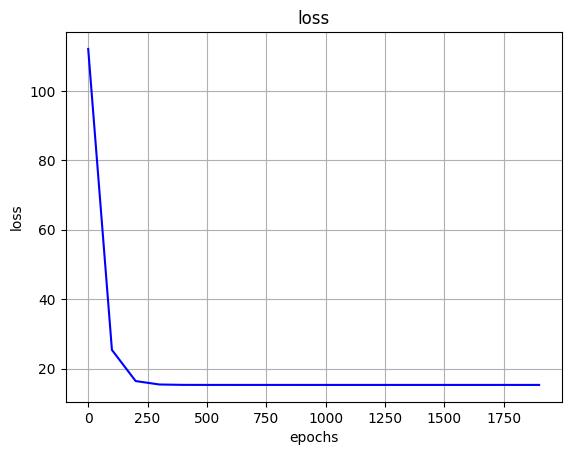

In [91]:
plt.plot(history[:,0], history[:, 1], 'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.grid()
plt.show()